In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.VERSION)
print(keras.__version__)

1.12.0
2.1.6-tf


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# 探索数据
print(train_images.shape)
print(len(train_images))
print(train_labels[:20])

(60000, 28, 28)
60000
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


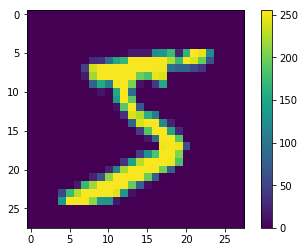

In [4]:
# 检查训练集中的第一张图片
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()  # 发现像素值介于0到255之间
plt.grid(False)

In [5]:
# 预处理数据
train_images = train_images / 255.0
test_images = test_images / 255.0  # 使像素值介于0到1

class_names = ["数字0", "数字1", "数字2", "数字3", "数字4", "数字5", "数字6", "数字7", "数字8", "数字9"]

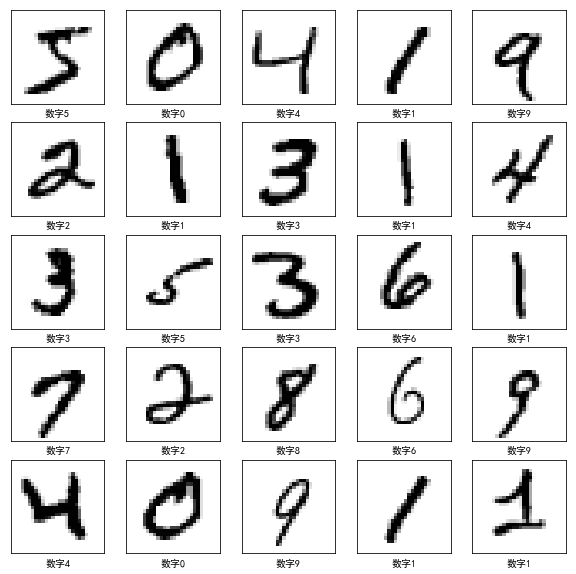

In [6]:
# 显示训练集前25张图片
plt.rc('font', family='SimHei')  # 显示中文，还有参数size

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])

In [7]:
# 设置层
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),  # 128个节点
    keras.layers.Dense(10, activation=tf.nn.softmax)  # 给出10个类别的预测概率
])

In [8]:
# 编译模型
model.compile(optimizer=tf.train.AdamOptimizer(),  # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])  # 指标

In [9]:
# 训练模型
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2604 - acc: 0.9256: 0s - loss: 0.308
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1157 - acc: 0.9657:
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0794 - acc: 0.9759: 2s - loss: 0.0 - ETA: 1s - loss: 0
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0591 - acc: 0.9818
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0461 - acc: 0.9852


In [10]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.9777


In [11]:
# 做出预测
predictions = model.predict(test_images)
predictions[0]  # 第一个图片的预测，分别给出10个类别的预测概率

array([6.6796434e-07, 2.8844514e-08, 4.1269939e-04, 3.5094018e-03,
       1.9589386e-11, 5.6900713e-08, 2.7083271e-12, 9.9607027e-01,
       4.4456146e-07, 6.3767911e-06], dtype=float32)

In [16]:
print(np.argmax(predictions[0])) # 模型预测的类别
print(test_labels[0]) # 图片实际的类别

7
7


In [36]:
# 将预测绘制成图来查看10个通道
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:.2f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.xticks(range(10), class_names, rotation=90)

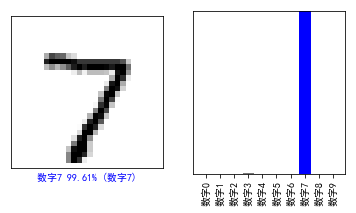

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

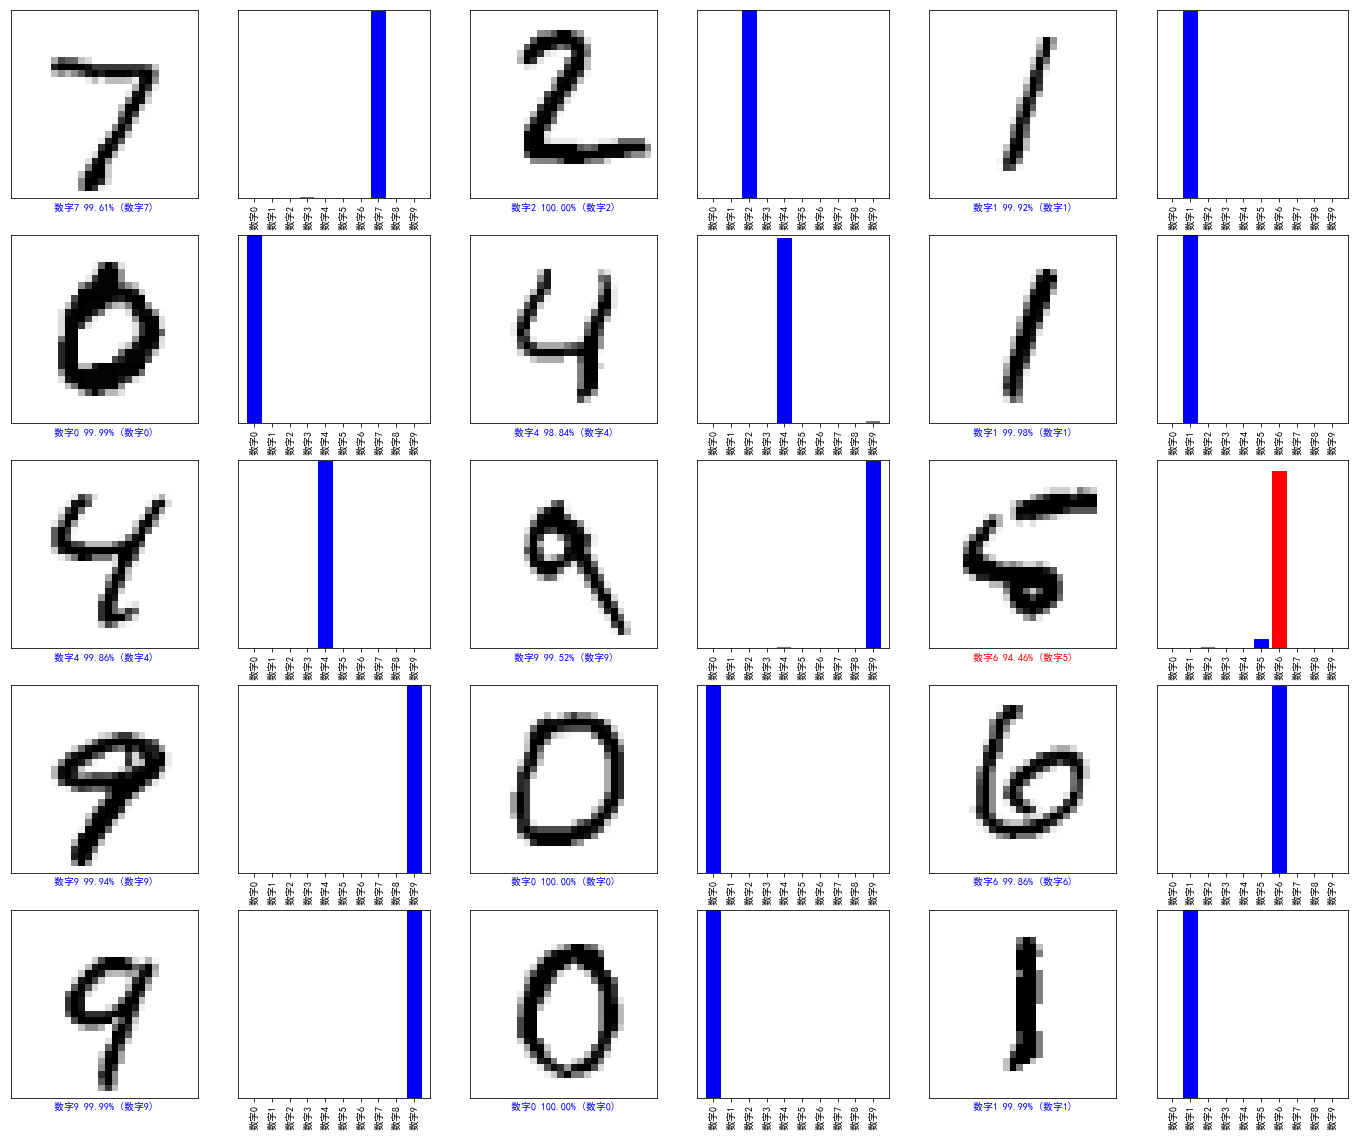

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [29]:
img = test_images[0]
img.shape

(28, 28)

In [30]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [31]:
# 预测单张图片
predictions_single = model.predict(img)
print(predictions_single)

[[6.6796372e-07 2.8844514e-08 4.1269860e-04 3.5093934e-03 1.9589311e-11
  5.6900713e-08 2.7083166e-12 9.9607027e-01 4.4456058e-07 6.3767725e-06]]


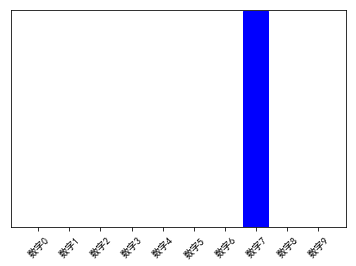

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

7